In [3]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
Data = pd.read_csv('user3_gps_DataFrame_Hour_of_Day.csv')
df = pd.DataFrame(Data)

Train = df[['latitude','longitude','Z_Value','Decimal_Z_Value',
            'Hour','Mon','Tue','Wed','Thu','Fri','Sat','Sun',
            'Next_Lat','Next_Lon','Next_Z','Next_Dec_Z']]

########################################################################
#################### Preparation and Prediction on #####################
#################### LatLong-Value DataSet #############################
########################################################################
Predictors_Lt_Lg_DataFrame = Train[['latitude', 'longitude', 'Hour','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
Predictors_Lt_Lg = Predictors_Lt_Lg_DataFrame.as_matrix().astype(float)
Target_Lt_Lg_DataFrame = Train[['Next_Lat', 'Next_Lon']]
Targets_Lt_Lg = Target_Lt_Lg_DataFrame.as_matrix().astype(float)

In [5]:
model_1 = Sequential()
model_1.add(Dense(250, activation='relu', input_shape=(Predictors_Lt_Lg.shape[1],)))
model_1.add(Dense(2, activation='relu'))
model_1.compile(optimizer='adam', loss='mean_squared_error')
model_1_training = model_1.fit(Predictors_Lt_Lg, Targets_Lt_Lg, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 2s - loss: 820.7206        

In [8]:
model_2 = Sequential()
model_2.add(Dense(250, activation='relu', input_shape=(Predictors_Lt_Lg.shape[1],)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='relu'))
model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2_training = model_2.fit(Predictors_Lt_Lg, Targets_Lt_Lg, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 3s - loss: 7565.6218       

In [7]:
model_3 = Sequential()
model_3.add(Dense(250, activation='tanh', input_shape=(Predictors_Lt_Lg.shape[1],)))
model_3.add(Dense(250, activation='tanh'))
model_3.add(Dense(2, activation='relu'))
model_3.compile(optimizer='adam', loss='mean_squared_error')
model3_training = model_3.fit(Predictors_Lt_Lg, Targets_Lt_Lg, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 3s - loss: 579.0920        

In [9]:
model_4 = Sequential()
model_4.add(Dense(500, activation='tanh', input_shape=(Predictors_Lt_Lg.shape[1],)))
model_4.add(Dense(500, activation='tanh'))
model_4.add(Dense(2, activation='relu'))
model_4.compile(optimizer='adam', loss='mean_squared_error')
model4_training = model_4.fit(Predictors_Lt_Lg, Targets_Lt_Lg, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 5s - loss: 211.5294        

In [10]:
model_5 = Sequential()
model_5.add(Dense(250, activation='tanh', input_shape=(Predictors_Lt_Lg.shape[1],)))
model_5.add(Dense(250, activation='tanh'))
model_5.add(Dense(250, activation='tanh'))
model_5.add(Dense(2, activation='relu'))
model_5.compile(optimizer='adam', loss='mean_squared_error')
model5_training = model_5.fit(Predictors_Lt_Lg, Targets_Lt_Lg, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 4s - loss: 502.7957        

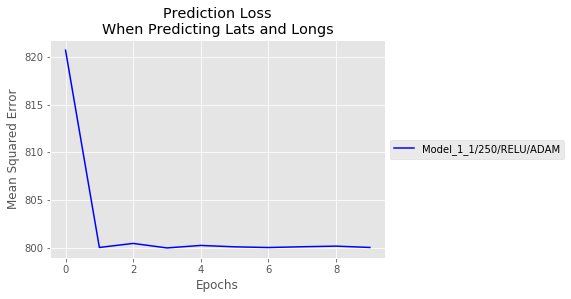

In [11]:
plt.style.use('ggplot')

plt.plot(model_1_training.history['loss'], color='blue', label='Model_1_1/250/RELU/ADAM')
plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')


plt.show()

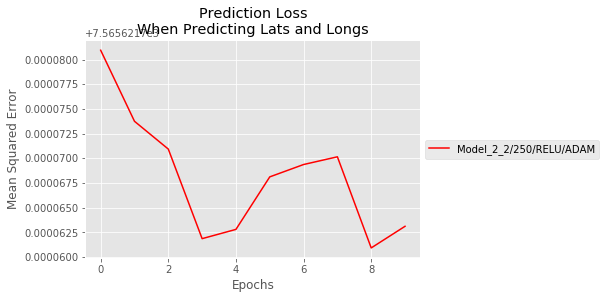

In [13]:
plt.plot(model_2_training.history['loss'], color='red', label='Model_2_2/250/RELU/ADAM')
plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')
plt.show()

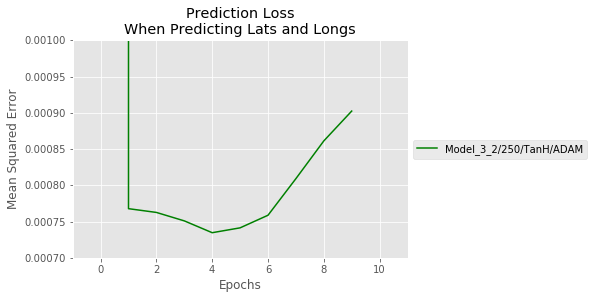

In [14]:
plt.plot(model3_training.history['loss'], color='green', label='Model_3_2/250/TanH/ADAM')
plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')
plt.axis([-1, 11, 0.0007, 0.001])
plt.show()

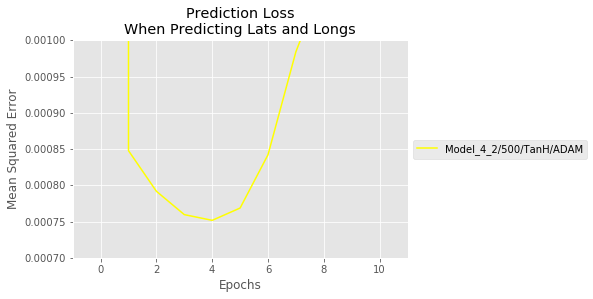

In [15]:
plt.plot(model4_training.history['loss'], color='yellow', label='Model_4_2/500/TanH/ADAM')
plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')
plt.axis([-1, 11, 0.0007, 0.001])
plt.show()

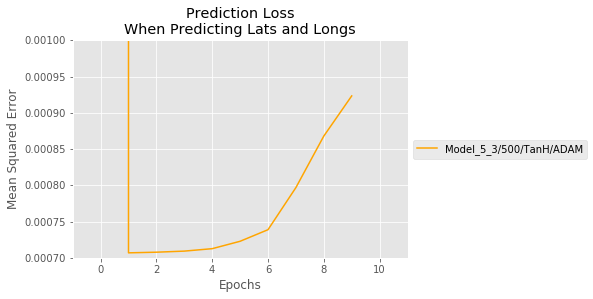

In [16]:
plt.plot(model5_training.history['loss'], color='orange', label='Model_5_3/500/TanH/ADAM')
plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')
plt.axis([-1, 11, 0.0007, 0.001])
plt.show()

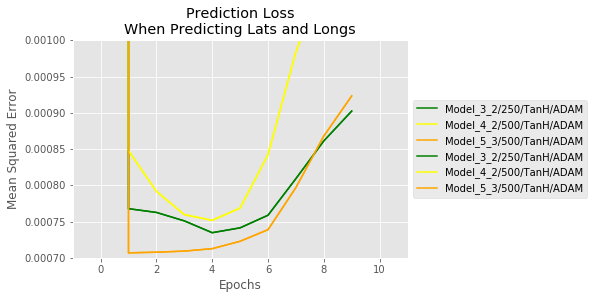

In [18]:
plt.plot(model3_training.history['loss'], color='green', label='Model_3_2/250/TanH/ADAM')

plt.plot(model4_training.history['loss'], color='yellow', label='Model_4_2/500/TanH/ADAM')

plt.plot(model5_training.history['loss'], color='orange', label='Model_5_3/500/TanH/ADAM')

plt.title('Prediction Loss\nWhen Predicting Lats and Longs')
plt.xlabel('Epochs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Mean Squared Error')
plt.axis([-1, 11, 0.0007, 0.001])

plt.show()

In [26]:
print('Predictors: %r'%Predictors_Lt_Lg[48876])
print('Target: %r'%Targets_Lt_Lg[48876])

Predictors: array([  39.907944,  116.45642 ,  730.      ,    0.      ,    0.      ,
          1.      ,    0.      ,    0.      ,    0.      ,    0.      ])
Target: array([  39.908212,  116.456493])


![title](ground_truth.png)

# Model_3's prediction

In [29]:
print('Predicted Lats and Longs By Model 3: %r' %model_3.predict(Predictors_Lt_Lg[[48876]]))

Predicted Lats and Longs By Model 3: array([[  39.98899841,  116.31922913]], dtype=float32)


![title](model_3_prediction.png)

# Model_4's prediction

In [30]:
print('Predicted Lats and Longs By Model 4: %r' %model_4.predict(Predictors_Lt_Lg[[48876]]))

Predicted Lats and Longs By Model 4: array([[  40.02592468,  116.30806732]], dtype=float32)


![title](model_4_prediction.png)

# Model_4's prediction

In [31]:
print('Predicted Lats and Longs By Model 5: %r' %model_5.predict(Predictors_Lt_Lg[[48876]]))

Predicted Lats and Longs By Model 5: array([[  39.95727158,  116.32475281]], dtype=float32)


![title](model_5_prediction.png)